In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.style.use("dark_background")

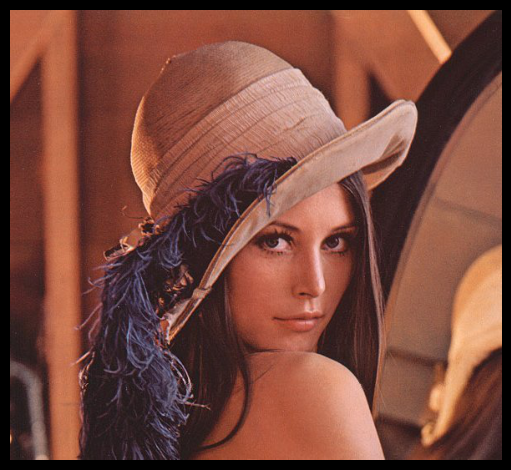

In [2]:
img = imread("images/lenna.jpg")
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
img.shape

(539, 589, 3)

In [4]:
# Split the image into its RBG channels
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2] 

In [5]:
# Singular Value Decomposition for each channel seperately
U_red, S_red, Vt_red = np.linalg.svd(red_channel)
U_green, S_green, Vt_green = np.linalg.svd(green_channel)
U_blue, S_blue, Vt_blue = np.linalg.svd(blue_channel)

In [6]:
max_S_red = S_red.size
max_S_green = S_green.size
max_S_blue = S_blue.size

print(max_S_red, max_S_green, max_S_blue)

539 539 539


In [7]:
num_S = min(max_S_red, max_S_green, max_S_blue)
num_S

539

In [8]:
def low_rank_approx(rank, U, S, Vt):
    """
    A function to compute a lower rank approximation of the image.

    Parameters:
    -----------
    - rank (int): Higher the value of rank, the closer the approximated image is to the original imag
    - U (m x m array): Left Singular Vectors which are the columns of matrix U.
    - S (m x n array): Is a diagonal matrix containing the singular values of A.
    - Vt (n x n array): Right Singular Vectors which are the rows of the matrix Vt.
    """
    S = np.diag(S)
    X_approx = U[:, :rank] @ S[:rank, :rank] @ Vt[:rank, :]
    return X_approx

In [9]:
rank = 100
compressed_red = low_rank_approx(rank, U_red, S_red, Vt_red)
compressed_green = low_rank_approx(rank, U_green, S_green, Vt_green)
compressed_blue = low_rank_approx(rank, U_blue, S_blue, Vt_blue)

In [10]:
compressed_image = np.clip(np.stack((compressed_red, compressed_green, compressed_blue), axis=-1), 0, 255).astype(np.uint8)

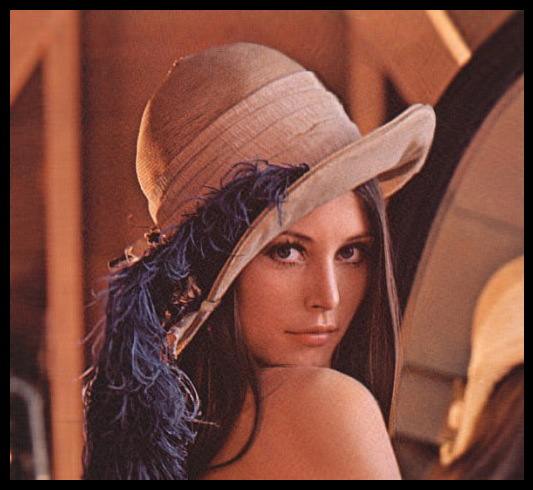

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(compressed_image)
plt.axis('off')
plt.tight_layout()
plt.savefig('images/output.jpg', pad_inches=0, bbox_inches='tight')
plt.show()

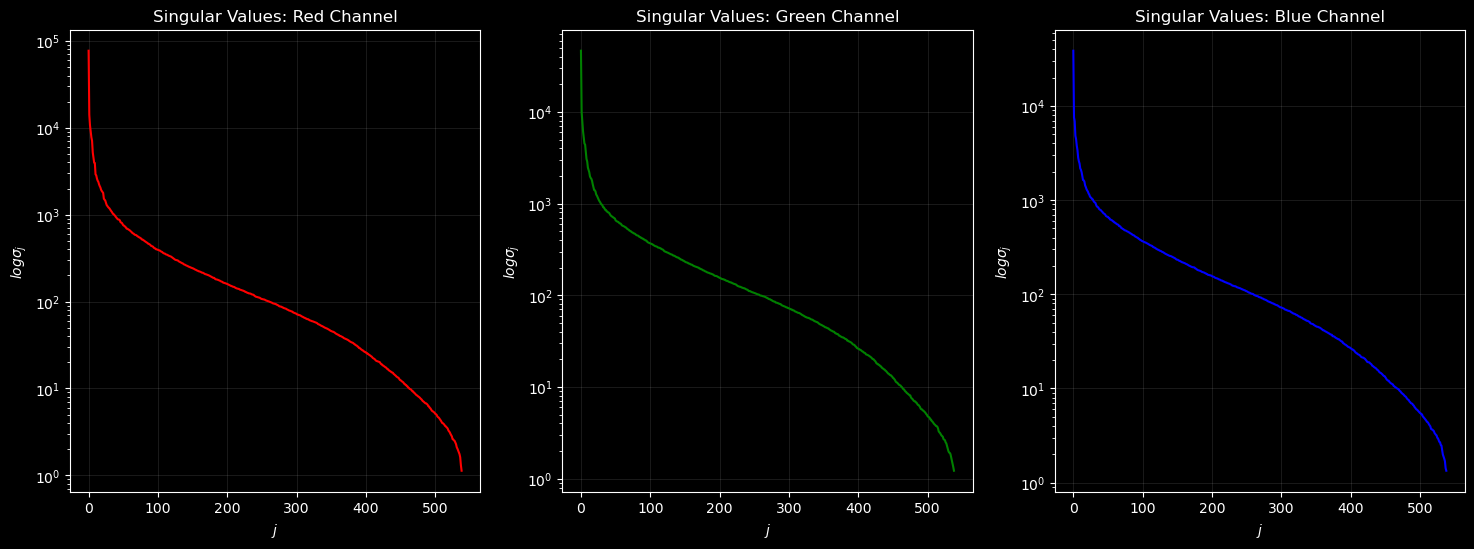

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].semilogy(S_red, color='red')
ax[0].set_title("Singular Values: Red Channel")
ax[0].set_xlabel('$j$')
ax[0].set_ylabel('$log\sigma_j$')
ax[0].grid(alpha=0.1)

ax[1].semilogy(S_green, color='green')
ax[1].set_title("Singular Values: Green Channel")
ax[1].set_xlabel('$j$')
ax[1].set_ylabel('$log\sigma_j$')
ax[1].grid(alpha=0.1)

ax[2].semilogy(S_blue, color='blue')
ax[2].set_title("Singular Values: Blue Channel")
ax[2].set_xlabel('$j$')
ax[2].set_ylabel('$log\sigma_j$')
ax[2].grid(alpha=0.1)

plt.show()

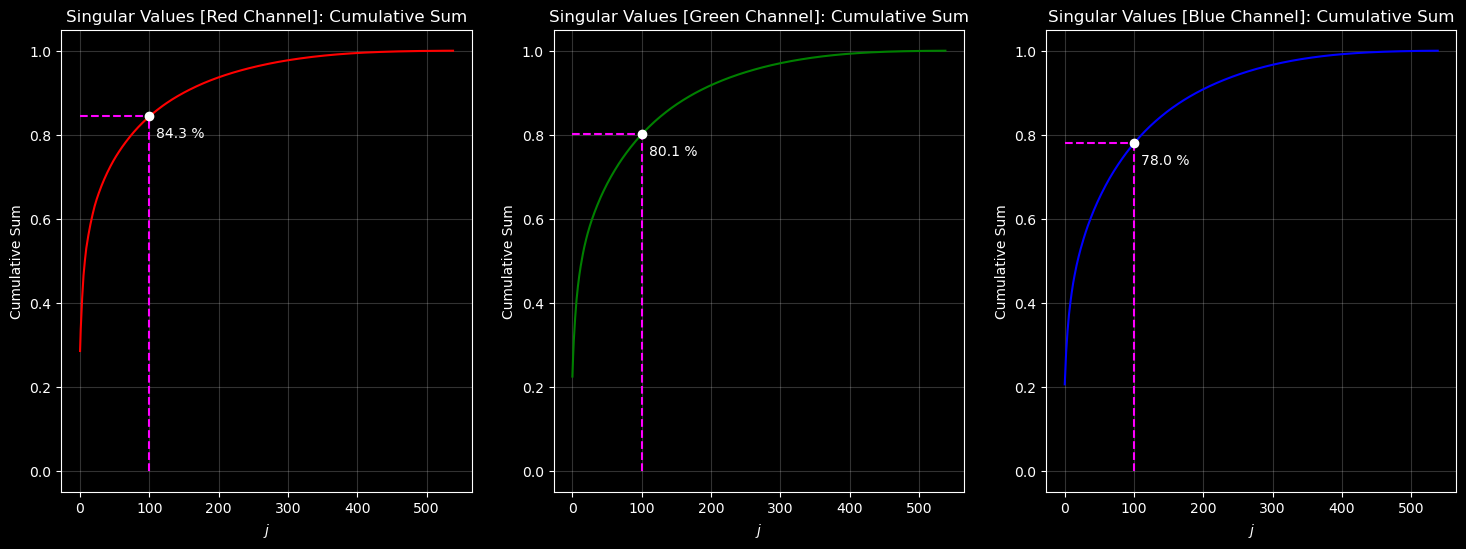

In [13]:
fig2, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].plot(np.cumsum(S_red/np.sum(S_red)), color='red')
ax[0].set_title('Singular Values [Red Channel]: Cumulative Sum')
ax[0].set_xlabel('$j$')
ax[0].set_ylabel('Cumulative Sum')
ax[0].vlines(x=rank, ymin=0, ymax=np.cumsum(S_red/np.sum(S_red))[rank], color='magenta', linestyle='--')
ax[0].hlines(y=np.cumsum(S_red/np.sum(S_red))[rank], xmin=0.0, xmax=rank, color='magenta', linestyle='--')
ax[0].plot(rank, np.cumsum(S_red/np.sum(S_red))[rank], 'wo')
ax[0].text(
    x=rank + 10,
    y=np.cumsum(S_red/np.sum(S_red))[rank] - 0.05,
    s=f"{round(np.cumsum(S_red/np.sum(S_red))[rank]*100, 1)} %"
)
ax[0].grid(alpha=0.2)

ax[1].plot(np.cumsum(S_green/np.sum(S_green)), color='green')
ax[1].set_title('Singular Values [Green Channel]: Cumulative Sum')
ax[1].set_xlabel('$j$')
ax[1].set_ylabel('Cumulative Sum')
ax[1].vlines(x=rank, ymin=0, ymax=np.cumsum(S_green/np.sum(S_green))[rank], color='magenta', linestyle='--')
ax[1].hlines(y=np.cumsum(S_green/np.sum(S_green))[rank], xmin=0.0, xmax=rank, color='magenta', linestyle='--')
ax[1].plot(rank, np.cumsum(S_green/np.sum(S_green))[rank], 'wo')
ax[1].text(
    x=rank + 10,
    y=np.cumsum(S_green/np.sum(S_green))[rank] - 0.05,
    s=f"{round(np.cumsum(S_green/np.sum(S_green))[rank]*100, 1)} %"
)
ax[1].grid(alpha=0.2)

ax[2].plot(np.cumsum(S_blue/np.sum(S_blue)), color='blue')
ax[2].set_title('Singular Values [Blue Channel]: Cumulative Sum')
ax[2].set_xlabel('$j$')
ax[2].set_ylabel('Cumulative Sum')
ax[2].vlines(x=rank, ymin=0, ymax=np.cumsum(S_blue/np.sum(S_blue))[rank], color='magenta', linestyle='--')
ax[2].hlines(y=np.cumsum(S_blue/np.sum(S_blue))[rank], xmin=0.0, xmax=rank, color='magenta', linestyle='--')
ax[2].plot(rank, np.cumsum(S_blue/np.sum(S_blue))[rank], 'wo')
ax[2].text(
    x=rank + 10,
    y=np.cumsum(S_blue/np.sum(S_blue))[rank] - 0.05,
    s=f"{round(np.cumsum(S_blue/np.sum(S_blue))[rank]*100, 1)} %"
)
ax[2].grid(alpha=0.2)
plt.show()